In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('loanpredictiondata.csv')

In [3]:
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [4]:
df.shape

(614, 13)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [9]:
gender=df["Gender"].mode()
gender[0]

'Male'

In [11]:
married=df["Married"].mode()
married[0]

'Yes'

In [13]:
dependent=df["Dependents"].mode()
dependent[0]

'0'

In [14]:
self_e=df["Self_Employed"].mode()
self_e[0]

'No'

In [18]:
loan_amt=df["LoanAmount"].median()
loan_amt

128.0

In [19]:
lat=df["Loan_Amount_Term"].mean()
lat

342.0

In [20]:
ch=df["Credit_History"].mode()
ch[0]

1.0

In [23]:
new_df=df.fillna({"Gender":gender[0],"Married":married[0],"Dependents":dependent[0],"Self_Employed":self_e[0],"LoanAmount":loan_amt,"Loan_Amount_Term":lat,"Credit_History":ch[0]})

In [24]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             614 non-null    object 
 2   Married            614 non-null    object 
 3   Dependents         614 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      614 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         614 non-null    float64
 9   Loan_Amount_Term   614 non-null    float64
 10  Credit_History     614 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [28]:
from sklearn.preprocessing import LabelEncoder
le =LabelEncoder()
df["nGender"]=le.fit_transform(df["Gender"])
df["nGender"].unique()

array([1, 0, 2], dtype=int64)

In [32]:
df["Married"]=le.fit_transform(df["Married"])
df["Married"].unique()

array([0, 1, 2], dtype=int64)

In [33]:
df["Dependents"]=le.fit_transform(df["Dependents"])
df["Dependents"].unique()

array([0, 1, 2, 3, 4])

In [34]:
df["Education"]=le.fit_transform(df["Education"])
df["Education"].unique()

array([0, 1])

In [35]:
df["Self_Employed"]=le.fit_transform(df["Self_Employed"])
df["Self_Employed"].unique()

array([0, 1, 2])

In [36]:
df["Property_Area"]=le.fit_transform(df["Property_Area"])
df["Property_Area"].unique()

array([3, 0, 2, 1, 4])

In [37]:
df["Loan_Status"]=le.fit_transform(df["Loan_Status"])
df["Loan_Status"].unique()

array([1, 0])

In [38]:
new_df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [39]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status',
       'nGender'],
      dtype='object')

In [43]:
newd=new_df.drop(["Loan_ID","Gender","Married","Education","Self_Employed","Property_Area","Loan_Status","Dependents"],axis=1)
newd.head()     

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
0,5849,0.0,128.0,360.0,1.0
1,4583,1508.0,128.0,360.0,1.0
2,3000,0.0,66.0,360.0,1.0
3,2583,2358.0,120.0,360.0,1.0
4,6000,0.0,141.0,360.0,1.0


In [45]:
newdf=pd.concat([newd,df["Loan_Status"],df["Property_Area"],df["Self_Employed"],df["Education"],df["Dependents"],df["Married"],df["Gender"]],axis=1)

In [46]:
newdf.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Property_Area,Self_Employed,Education,Dependents,Married,Gender
0,5849,0.0,128.0,360.0,1.0,1,3,0,0,0,0,1
1,4583,1508.0,128.0,360.0,1.0,0,0,0,0,1,1,1
2,3000,0.0,66.0,360.0,1.0,1,3,1,0,0,1,1
3,2583,2358.0,120.0,360.0,1.0,1,3,0,1,0,1,1
4,6000,0.0,141.0,360.0,1.0,1,3,0,0,0,0,1


In [47]:
newdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ApplicantIncome    614 non-null    int64  
 1   CoapplicantIncome  614 non-null    float64
 2   LoanAmount         614 non-null    float64
 3   Loan_Amount_Term   614 non-null    float64
 4   Credit_History     614 non-null    float64
 5   Loan_Status        614 non-null    int32  
 6   Property_Area      614 non-null    int32  
 7   Self_Employed      614 non-null    int32  
 8   Education          614 non-null    int32  
 9   Dependents         614 non-null    int32  
 10  Married            614 non-null    int64  
 11  Gender             614 non-null    int64  
dtypes: float64(4), int32(5), int64(3)
memory usage: 45.7 KB


In [48]:
x=newdf.drop(columns=["Loan_Status"],axis=1)
y=newdf["Loan_Status"]
     

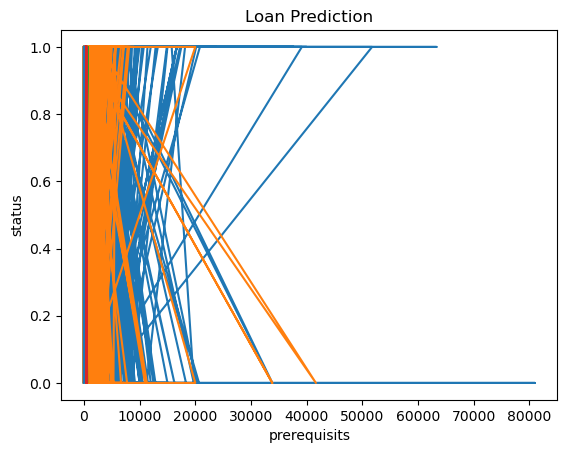

In [66]:
import matplotlib.pyplot as plt
plt.plot(x,y)
plt.xlabel('prerequisits')
plt.ylabel('status')
plt.title('Loan Prediction')
plt.show()

In [63]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
xscaled=pd.DataFrame(scaler.fit_transform(x),columns=x.columns)
     


In [50]:
xscaled.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Self_Employed,Education,Dependents,Married,Gender
0,0.070489,0.000000,0.172214,0.74359,1.0,0.75,0.0,0.0,0.00,0.0,0.5
1,0.054830,0.036192,0.172214,0.74359,1.0,0.00,0.0,0.0,0.25,0.5,0.5
2,0.035250,0.000000,0.082489,0.74359,1.0,0.75,0.5,0.0,0.00,0.5,0.5
3,0.030093,0.056592,0.160637,0.74359,1.0,0.75,0.0,1.0,0.00,0.5,0.5
4,0.072356,0.000000,0.191027,0.74359,1.0,0.75,0.0,0.0,0.00,0.0,0.5


In [51]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [52]:
x_train,x_test,y_train,y_test=train_test_split(xscaled,y,test_size=0.2,random_state=2)

In [73]:
df1

,model,best_score,best_params,accuracy_score
0,Randomforest,0.814657,{},1.000000
1,logisticregression,0.818738,{},0.818737
2,SVC,0.818738,{},0.820774


In [70]:
x_train_pred=clf.predict(x_train)
x_train_accuracy_score=accuracy_score(y_train,x_train_pred)
x_train_accuracy_score     

0.8207739307535642

In [71]:
x_test_pred=clf.predict(x_test)
x_test_accuracy_score=accuracy_score(y_test,x_test_pred)
x_test_accuracy_score     

0.7723577235772358

In [72]:
cm=confusion_matrix(y_test,x_test_pred)
cm
     

array([[13, 26],
       [ 2, 82]], dtype=int64)